<a href="https://colab.research.google.com/github/srikanthravipati27/flipcart-complaint-classification/blob/main/FlipcartComplaintClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data1=pd.read_csv("/content/balanced_complaints.csv")
data2=pd.read_csv("/content/complaints.csv")

In [ ]:
!pip install sentence-transformers

import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch

# Load your dataset
df = pd.read_csv("balanced_complaints.csv")

# Define categories and descriptions
category_descriptions = {
    "Refund Delay": "Complaint about refund taking too long or not received.",
    "Size Mismatch": "Product size is incorrect or doesn't fit as expected.",
    "Wrong Product Delivered": "Received a completely different product than ordered.",
    "Tracking Issue": "Tracking information is missing or incorrect.",
    "Damaged Product": "Product arrived damaged or broken.",
    "Late Delivery": "Product delivered later than expected.",
    "Order Not Delivered": "Customer never received the order.",
    "Duplicate Payment": "Customer was charged twice or duplicate payment occurred.",
    "App/Website Glitch": "Issues with the app or website functionality.",
    "Order Cancellation Without Notice": "Order was cancelled without informing the customer.",
    "Customer Support Delay": "Support team is taking too long to respond.",
    "Incorrect Billing": "Incorrect amount charged or billing issue.",
    "Payment Issue": "Problems with payment processing.",
    "Missing Items": "Some items from the order were missing.",
    "Return Pickup Delay": "Pickup for product return is delayed.",
    "Exchange Process Issue": "Issues with the product exchange process.",
    "Coupon Code Issue": "Coupon codes not working or invalid."
}

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')
category_labels = list(category_descriptions.keys())
category_embeddings = model.encode(list(category_descriptions.values()), convert_to_tensor=True)

# Reclassify based on similarity
def reclassify(text):
    embedding = model.encode(text, convert_to_tensor=True)
    scores = util.cos_sim(embedding, category_embeddings)
    return category_labels[torch.argmax(scores).item()]

# Apply reclassification
df['Corrected_Category'] = df['Complaint'].apply(reclassify)

# Save the corrected file
df.to_csv("corrected_complaints.csv", index=False)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 892.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [ ]:
data1.head()

,Complaint,Predicted_category
0,Full away commercial production. It’s been wee...,Refund Delay
1,Production care friend forward national clearl...,Refund Delay
2,Seat performance movement cultural. The size d...,Size Mismatch
3,The color of the Result delivered is completel...,Wrong Product Delivered
4,Follow thing at school. The tracking number is...,Tracking Issue


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17822 entries, 0 to 17821
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Complaint           17822 non-null  object
 1   Predicted_category  17822 non-null  object
dtypes: object(2)
memory usage: 278.6+ KB


In [ ]:
data1["Complaint"].duplicated().sum()

np.int64(0)

In [ ]:
data1['Predicted_category'].value_counts()

,count
Predicted_category,
Refund Delay,938
Size Mismatch,938
Wrong Product Delivered,938
Tracking Issue,938
Delivery Agent Misbehavior,938
Customer Support Delay,938
Incorrect Billing,938
App/Website Glitch,938
Duplicate Payment,938


In [ ]:
data1['Complaint Text'] = data1['Complaint Text'].str.replace(r"^Flipkart\s*-\s*", "", regex=True)

In [ ]:
data1.duplicated().sum()

np.int64(0)

In [ ]:
pip install accelerate==0.24.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 854.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
import torch
import transformers
import accelerate

print(torch.__version__)
print(transformers.__version__)
print(accelerate.__version__)


2.6.0+cu124
4.54.0
1.9.0


In [ ]:
from transformers.pipelines import pipeline
import pandas as pd
complaints = data1['Complaint'].unique().tolist()
candidate_labels = data2['Predicted_category'].unique().tolist()
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
results = []
for text in complaints:
    prediction = classifier(text, candidate_labels)
    top_category = prediction['labels'][0]
    results.append({"Complaint": text, "Predicted_category": top_category})
data = pd.DataFrame(results)

Device set to use cuda:0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 37
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Complaint           30 non-null     object
 1   Predicted_category  30 non-null     object
dtypes: object(2)
memory usage: 720.0+ bytes


In [ ]:
data.head(73)

,Complaint,Predicted_category
0,I received a completely different product from...,Wrong Product Delivered
1,Refund has not been processed even after multi...,Refund Delay
2,The exchange request is not getting processed.,Order Not Delivered
3,The delivery was delayed beyond the expected d...,Late Delivery
4,Order was marked as delivered but I did not re...,Late Delivery
5,The tracking information was not updated for s...,Tracking Issue
6,Exchange product was not delivered on time.,Late Delivery
7,The product size does not match the descriptio...,Size Mismatch
8,Customer support closed my complaint without r...,Customer Support Delay
9,The product quality is extremely poor and not ...,Product Quality Issue


In [ ]:
data=data.drop([26,29,36,38,2,4,10,15,24])

KeyError: '[26, 29, 36, 38, 2, 4, 10, 15, 24] not found in axis'

In [ ]:
data.reset_index()

,index,Complaint,Predicted_category
0,0,I received a completely different product from...,Wrong Product Delivered
1,1,Refund has not been processed even after multi...,Refund Delay
2,3,The delivery was delayed beyond the expected d...,Late Delivery
3,5,The tracking information was not updated for s...,Tracking Issue
4,6,Exchange product was not delivered on time.,Late Delivery
5,7,The product size does not match the descriptio...,Size Mismatch
6,8,Customer support closed my complaint without r...,Customer Support Delay
7,9,The product quality is extremely poor and not ...,Product Quality Issue
8,11,Product was delivered without the mentioned ac...,Missing Items
9,12,The invoice was not generated properly for my ...,Incorrect Billing


In [ ]:
data.to_csv("complaints.csv", index=False)
from google.colab import files
files.download("complaints.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
data4=pd.read_csv("/content/corrected_complaints.csv")

In [ ]:
data4.tail(30)

,Complaint,Predicted_category,Corrected_Category
17792,"Audience save spring once. It’s been weeks, an...",Refund Delay,Refund Delay
17793,I've been waiting weeks for my refund for the ...,Refund Delay,Refund Delay
17794,My Military arrived cracked and completely unu...,Damaged Product,Damaged Product
17795,Possible forget plant development series aroun...,Duplicate Payment,Duplicate Payment
17796,"Despite paying extra for same-day delivery, my...",Late Delivery,Late Delivery
17797,The Ceiling Fan arrived broken and the packagi...,Damaged Product,Damaged Product
17798,I only got a partial refund for the returned C...,Incorrect Billing,Refund Delay
17799,I asked for Grey but received Orange for the W...,Wrong Product Delivered,Wrong Product Delivered
17800,The color of the Movie delivered is completely...,Wrong Product Delivered,Wrong Product Delivered
17801,Stop military drive ahead production leave. Th...,Tracking Issue,Tracking Issue


In [ ]:
data["Complaint"].duplicated().sum()

np.int64(0)

In [ ]:
data.head(30)

,Complaint,Predicted_category
0,I received a completely different product from...,Wrong Product Delivered
1,Refund has not been processed even after multi...,Refund Delay
3,The delivery was delayed beyond the expected d...,Late Delivery
5,The tracking information was not updated for s...,Tracking Issue
6,Exchange product was not delivered on time.,Late Delivery
7,The product size does not match the descriptio...,Size Mismatch
8,Customer support closed my complaint without r...,Customer Support Delay
9,The product quality is extremely poor and not ...,Product Quality Issue
11,Product was delivered without the mentioned ac...,Missing Items
12,The invoice was not generated properly for my ...,Incorrect Billing


In [ ]:
pd.set_option('display.max_colwidth', None)
filtered_data = data[data['Category'] == 'Payment Issue']
print(filtered_data)
# data.head(30)

      Complaint ID  \
3                4   
29              30   
79              80   
89              90   
93              94   
...            ...   
4960          4961   
4964          4965   
4966          4967   
4988          4989   
4991          4992   

                                                                  Complaint Text  \
3                             The delivery was delayed beyond the expected date.   
29    Flipkart - Order confirmation was not received but the amount was debited.   
79                I received a completely different product from what I ordered.   
89                       The Flipkart app crashed several times during checkout.   
93                              Return pickup was rejected without valid reason.   
...                                                                          ...   
4960                              Duplicate payment was made for a single order.   
4964       Flipkart - The app frequently logs me out during the

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data['Complaint Text'].duplicated().sum()


np.int64(4927)

In [ ]:
data = data.drop_duplicates(subset='Complaint Text').reset_index(drop=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Complaint ID    73 non-null     int64 
 1   Complaint Text  73 non-null     object
 2   Category        73 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


In [ ]:
data['Category'].value_counts()

NameError: name 'data' is not defined

In [ ]:
data.head(73)

,Complaint ID,Complaint Text,Category
0,1,I received a completely different product from what I ordered.,Return Pickup Delay
1,2,Refund has not been processed even after multiple follow-ups.,Order Cancellation Without Notice
2,3,The exchange request is not getting processed.,App/Website Glitch
3,4,The delivery was delayed beyond the expected date.,Payment Issue
4,5,Order was marked as delivered but I did not receive it.,Size Mismatch
...,...,...,...
68,285,Flipkart - Incorrect product color was delivered.,Incorrect Billing
69,308,Flipkart - The product size does not match the description provided.,Exchange Process Issue
70,319,Flipkart - The tracking status showed 'Delivered' but I did not receive it.,Product Quality Issue
71,358,Flipkart - Delivery partner refused to deliver to my location.,Return Pickup Delay


//


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/balanced_complaints.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4853 entries, 0 to 4852
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Complaint           4853 non-null   object
 1   Predicted_category  4853 non-null   object
dtypes: object(2)
memory usage: 76.0+ KB


In [ ]:
data.duplicated().sum()

np.int64(98)

In [ ]:
# !pip uninstall -y torch

In [ ]:
# !pip install torch

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on:", device)


Running on: cuda


In [ ]:
data.info()

In [ ]:
#checking the null values
data.isnull().sum()

,0
Complaint ID,0
Complaint Text,0
Category,0


In [ ]:
#value counnts for category variable
data['Complaint'].duplicated().sum()

np.int64(0)

In [ ]:
#value counnts for category variable
data['Predicted_category'].value_counts()

,count
Predicted_category,
Wrong Product Delivered,938
Late Delivery,729
Damaged Product,417
Missing Items,388
Order Not Delivered,371
Incorrect Billing,248
Payment Issue,248
Tracking Issue,224
Refund Delay,198


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
#getting the lengths of each complaint
data['complaint length']=data['Complaint Text'].apply(lambda x:len(x.split()))

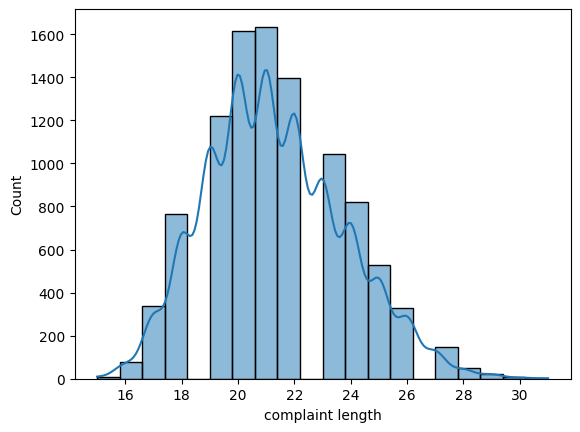

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data['complaint length'],bins=20,kde=True)
plt.show()

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
#function fr wordnet pos tagging
def wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
#preprocessing the raw text
import re
stop_words=stopwords.words('english')
lemmatizer=WordNetLemmatizer()
negation_words = {'not', 'no', 'nor', 'don', "don't", 'shouldn’t', 'wouldn’t', 'couldn’t', 'didn’t', 'doesn’t', 'hadn’t', 'won’t'}
stop_words = [word for word in stop_words if word not in negation_words]
def preprocess_text(text):
  text=text.lower()
  text = re.sub(r'order\s*od\d+', '', text)
  text=nltk.word_tokenize(text)
  text=[word for word in text if word not in string.punctuation]
  text=[word for word in text if word not in stop_words]
  text_tag=nltk.pos_tag(text)
  text=[lemmatizer.lemmatize(word,wordnet_pos(pos)) for word,pos in text_tag]
  return " ".join(text)
data['processed_text']=data['Complaint'].apply(preprocess_text)


In [ ]:
data.iloc[34,2]

'behavior provide meet adult final week game court choice fast small medical music'

In [ ]:
data['Predicted_category'].value_counts()

,count
Predicted_category,
Wrong Product Delivered,938
Late Delivery,729
Damaged Product,417
Missing Items,388
Order Not Delivered,371
Incorrect Billing,248
Payment Issue,248
Tracking Issue,224
Refund Delay,198


In [ ]:
#getting pretrained glove embeddings of 300 dimensions
import numpy as np
path="/content/drive/MyDrive/wiki-news-300d-1M.vec"
# def glove_embedding(path):
#   embeddings_index={}
#   with open(path,'r',encoding='utf-8') as f:
#     for line in f:
#       values=line.split()
#       word=values[0]
#       vec=np.asarray(values[1:],dtype='float32')
#       embeddings_index[word]=vec
#   return embeddings_index
# glove_embeddings=glove_embedding(path)
def fasttext_embedding(path):
    embeddings_index = {}
    with open(path, 'r', encoding='utf-8') as f:
        next(f)
        for line in f:
            values = line.rstrip().split(' ')
            word = values[0]
            vec = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vec
    return embeddings_index

# Load FastText .vec file
fasttext_embeddings = fasttext_embedding(path)


In [ ]:
#preparing vocabulary for the dataset
from collections import Counter
import torch
data['tokens']=data['processed_text'].apply(lambda x:x.split())
all_tokens=[token for sublist in data['tokens'].tolist() for token in sublist]
token_count=Counter(all_tokens)
vocab=sorted(token_count,key=token_count.get,reverse=True)
vocab = ['<PAD>', '<UNK>'] + vocab
wordtoindex={word:idx for idx,word in enumerate(vocab)}
indextoword={idx:word for word,idx in wordtoindex.items()}
print(wordtoindex)
print(indextoword)


{'<PAD>': 0, '<UNK>': 1, 'order': 2, '’': 3, 'product': 4, 'get': 5, 'not': 6, 'still': 7, 'receive': 8, 'one': 9, 'deliver': 10, 'no': 11, 'delivery': 12, 'item': 13, 'return': 14, 'amount': 15, 'refund': 16, 'without': 17, 'week': 18, 'arrive': 19, 'different': 20, 'wait': 21, 'use': 22, 'charge': 23, 'cancel': 24, 'apply': 25, 'respond': 26, 'pay': 27, 'app': 28, 'size': 29, 'go': 30, 'look': 31, 'support': 32, 'wallet': 33, 'update': 34, 'pickup': 35, 'code': 36, 'guy': 37, 'twice': 38, 'track': 39, 'rude': 40, 'online': 41, 'totally': 42, 'request': 43, 'payment': 44, 'place': 45, 'checkout': 46, 'valid': 47, 'saw': 48, 'miss': 49, 'single': 50, 'crash': 51, 'match': 52, 'inform': 53, 'stuck': 54, 'unprofessional': 55, 'coupon': 56, 'chat': 57, 'bill': 58, "n't": 59, 'final': 60, 'never': 61, 'number': 62, 'say': 63, 'completely': 64, 'overcharge': 65, 'confirm': 66, 'day': 67, 'invalid': 68, 'package': 69, 'ask': 70, 'damage': 71, 'flipkart': 72, 'even': 73, 'beyond': 74, 'expect

In [ ]:
#mapping the vocab to the pretrained glove embeddings
embedding_dimension=300
embedding_matrix=np.zeros((len(vocab),embedding_dimension))
for word,idx in wordtoindex.items():
  if word in fasttext_embeddings:
    embedding_matrix[idx]=fasttext_embeddings[word]
  else:
    embedding_matrix[idx]=np.random.normal(scale=0.6, size=(embedding_dimension,))


embedding_matrix=torch.tensor(embedding_matrix,dtype=torch.float32)
pad_idx = wordtoindex['<PAD>']
embedding_matrix[pad_idx] = torch.zeros(embedding_matrix.size(1))
embedding_matrix

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.7708, -0.2308,  0.3334,  ...,  0.3314, -0.4979,  0.4491],
        [ 0.0226, -0.0408, -0.0335,  ...,  0.1071,  0.1418,  0.0578],
        ...,
        [ 0.0233, -0.1947, -0.0417,  ...,  0.1394,  0.0851, -0.0981],
        [-0.1048,  0.1403, -0.0610,  ...,  0.0108,  0.1215, -0.1306],
        [ 0.1186, -0.0524, -0.0115,  ...,  0.0036,  0.2063, -0.0372]])

In [ ]:
#word2vec embeddings
# !pip install gensim

In [ ]:
# !pip install numpy==1.23.5 --quiet

In [ ]:
# from gensim.models import Word2Vec
# import numpy as np
# # Train Word2Vec on training set ONLY
# train_sentences = [text.split() for text in data["processed_text"].tolist()]

# EMBED_DIM = 100
# word2vec_model = Word2Vec(
#     sentences=train_sentences,
#     vector_size=EMBED_DIM,
#     window=5,
#     min_count=1,
#     workers=4,
#     sg=1,
#     epochs=50,
#     seed=42
# )
# # Build embedding matrix from scratch Word2Vec
# # Build embedding matrix from Word2Vec
# embedding_matrix = np.random.normal(0, 0.05, size=(len(vocab), EMBED_DIM)).astype("float32")

# for word, idx in wordtoindex.items():
#     if word in word2vec_model.wv:
#         embedding_matrix[idx] = word2vec_model.wv[word]

# # Set PAD token embedding to all zeros
# embedding_matrix[wordtoindex["<PAD>"]] = 0.0

# # Convert to torch tensor
# embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float32, device=device)


In [ ]:
#padding upto the 25 tokens and apply token to the index mapping
from torch.nn.utils.rnn import pad_sequence

def tokentoindex(tokens,wordtoindex):
  return [wordtoindex.get(token,wordtoindex['<UNK>']) for token in tokens]
data['token_indices']=data['tokens'].apply(lambda x:tokentoindex(x,wordtoindex))
max_len=25
def pad_to_fixed_length(indices, max_len, pad_idx):
    if len(indices) >= max_len:
        return indices[:max_len]
    else:
        return indices + [pad_idx] * (max_len - len(indices))

# Apply token to index mapping
data['token_indices'] = data['tokens'].apply(lambda x: tokentoindex(x, wordtoindex))

# Pad each to fixed 50 length
data['padded'] = data['token_indices'].apply(lambda x: pad_to_fixed_length(x, 50, wordtoindex['<PAD>']))

# Convert to tensor
padded_input = torch.tensor(data['padded'].to_list())

# padded_input=pad_sequence([torch.tensor(x) for x in data['token_indices']],batch_first=True,padding_value=wordtoindex['<PAD>'])
# padded_input[0]

In [ ]:
#encoding the category variable by using the labelencoder
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Predicted_category']=label_encoder.fit_transform(data['Predicted_category'])
num_classes=int(data['Predicted_category'].nunique())
category=torch.tensor(data['Predicted_category'].values,dtype=torch.long)
category.shape

torch.Size([17822])

In [ ]:
#computing the class weights for the category imbalance
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
        class_weight='balanced',
        classes = np.unique(data['Predicted_category']),
        y       = data['Predicted_category']
)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

In [ ]:
from sklearn.model_selection import train_test_split
train_val_input, test_input, train_val_category, test_category = train_test_split(padded_input, category, test_size=0.2, random_state=42, stratify=category)
train_input, val_input, train_category, val_category = train_test_split(train_val_input, train_val_category, test_size=0.2, random_state=42, stratify=train_val_category)

train_input = torch.tensor(train_input, dtype=torch.long).to(device)
val_input = torch.tensor(val_input, dtype=torch.long).to(device)
test_input = torch.tensor(test_input, dtype=torch.long).to(device)

train_category = torch.tensor(train_category, dtype=torch.long).to(device)
val_category = torch.tensor(val_category, dtype=torch.long).to(device)
test_category = torch.tensor(test_category, dtype=torch.long).to(device)


/tmp/ipython-input-1868272997.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_input = torch.tensor(train_input, dtype=torch.long).to(device)
/tmp/ipython-input-1868272997.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_input = torch.tensor(val_input, dtype=torch.long).to(device)
/tmp/ipython-input-1868272997.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_input = torch.tensor(test_input, dtype=torch.long).to(device)
/tmp/ipython-input-1868272997.py:9: UserWarning: To copy construct from a tensor, it is recommend

In [ ]:
#preparing the dataset and dataloader
from torch.utils.data import Dataset,DataLoader
class complaint_data(Dataset):
  def __init__(self,input_data,category):
    self.input_data=input_data
    self.category=category
  def __len__(self):
    return len(self.input_data)
  def __getitem__(self,idx):
    return self.input_data[idx],self.category[idx]
dataset_train = complaint_data(train_input, train_category)
dataset_val   = complaint_data(val_input, val_category)
dataset_test  = complaint_data(test_input, test_category)

train_dataloader = DataLoader(dataset_train, batch_size=32, shuffle=True, drop_last=True)
val_dataloader   = DataLoader(dataset_val, batch_size=32, shuffle=False, drop_last=True)
test_dataloader  = DataLoader(dataset_test, batch_size=32, shuffle=False, drop_last=True)

In [ ]:
#simple feedforward neural network
import torch.nn as nn
import torch.nn.functional as F
pad_idx = wordtoindex['<PAD>']
class classify_complaint(nn.Module):
  def __init__(self,embedding_matrix,hidden_dim,output_dim,freeze_embed=False):
    super(classify_complaint,self).__init__()
    vocab_size, embedding_dim = map(int, embedding_matrix.shape)
    self.embedding=nn.Embedding.from_pretrained(embedding_matrix,freeze=freeze_embed,padding_idx=pad_idx)

    self.classifier = nn.Sequential(
            nn.Linear(embedding_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(hidden_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.5),


            nn.Linear(32, output_dim)
        )
  def forward(self,x):
    emb = self.embedding(x)
    mask = (x != pad_idx).unsqueeze(-1)
    masked = emb * mask
    lengths = mask.sum(dim=1).clamp(min=1e-9)
    avg_pooled = masked.sum(dim=1) / lengths
    return self.classifier(avg_pooled)

In [ ]:
import torch.optim as optim

model = classify_complaint(embedding_matrix, 64, num_classes).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=1e-3)


train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

EPOCHS = 100
for epoch in range(EPOCHS):

    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_train_loss = total_loss / len(train_dataloader)
    train_acc = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)


    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_dataloader)
    val_acc = 100 * correct / total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)
    if epoch%10==0:
      print(f"Epoch {epoch+1}/{EPOCHS}, "f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}%, "f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%")


Epoch 1/100, Train Loss: 2.4860, Train Acc: 25.50%, Val Loss: 1.5457, Val Acc: 80.30%
Epoch 11/100, Train Loss: 0.7434, Train Acc: 77.42%, Val Loss: 0.2312, Val Acc: 91.71%
Epoch 21/100, Train Loss: 0.6161, Train Acc: 82.32%, Val Loss: 0.1589, Val Acc: 96.21%
Epoch 31/100, Train Loss: 0.5454, Train Acc: 84.16%, Val Loss: 0.1627, Val Acc: 96.10%
Epoch 41/100, Train Loss: 0.5305, Train Acc: 84.90%, Val Loss: 0.1575, Val Acc: 96.00%
Epoch 51/100, Train Loss: 0.5083, Train Acc: 85.44%, Val Loss: 0.1636, Val Acc: 96.00%
Epoch 61/100, Train Loss: 0.5023, Train Acc: 85.68%, Val Loss: 0.1657, Val Acc: 96.21%
Epoch 71/100, Train Loss: 0.4654, Train Acc: 86.79%, Val Loss: 0.1680, Val Acc: 96.28%
Epoch 81/100, Train Loss: 0.4424, Train Acc: 87.68%, Val Loss: 0.1756, Val Acc: 96.21%
Epoch 91/100, Train Loss: 0.4439, Train Acc: 87.73%, Val Loss: 0.1740, Val Acc: 96.17%


In [ ]:
#evaluating the simple neural network model
model.eval()
preds=[]
actual=[]
with torch.no_grad():
  for x,y in test_dataloader:
    output=model(x)
    _,predicted=torch.max(output.data,1)
    preds.extend(predicted.tolist())
    actual.extend(y.tolist())
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score
print("precision",precision_score(actual,preds,average='weighted'))
print("recall",recall_score(actual,preds,average='weighted'))
print("f1 score",f1_score(actual,preds,average='weighted'))
print("\nClassification Report")
print(classification_report(actual,preds))
print(confusion_matrix(actual,preds))

precision 0.9615812692993302
recall 0.9603040540540541
f1 score 0.9604898433917738

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       187
           1       0.99      1.00      1.00       186
           2       0.97      0.97      0.97       187
           3       0.99      0.86      0.92       187
           4       1.00      1.00      1.00       187
           5       1.00      0.99      1.00       186
           6       0.98      0.98      0.98       188
           7       0.96      0.94      0.95       187
           8       0.96      0.92      0.94       187
           9       1.00      1.00      1.00       187
          10       0.82      0.93      0.87       188
          11       0.89      0.91      0.90       186
          12       0.98      0.96      0.97       187
          13       0.96      0.97      0.97       186
          14       0.97      0.97      0.97       188
          15       0.99      

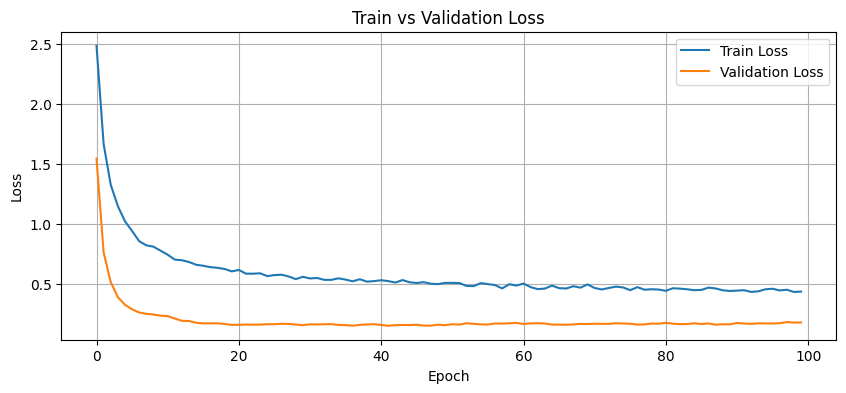

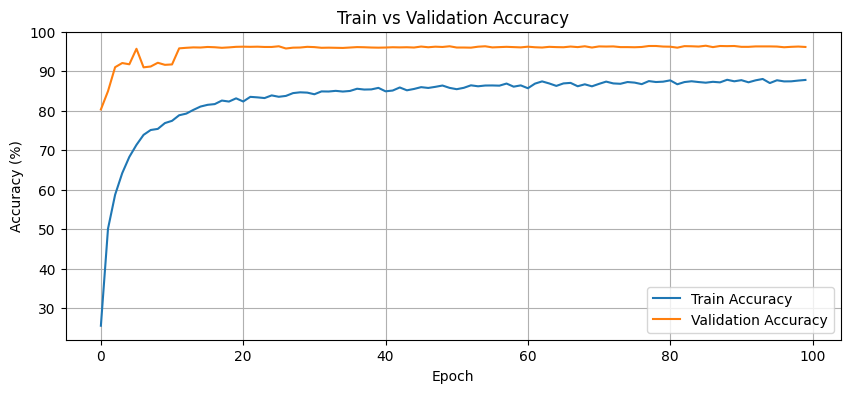

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#bidirectional lstm model

import torch.nn as nn
import torch.nn.functional as F

class LSTMComplaint(nn.Module):
    def __init__(
        self,
        embedding_matrix,
        hidden_dim,
        output_dim,
        n_layers=2,
        bidirectional=True,
        dropout=0.3,
        freeze_embed=False
    ):
        super().__init__()
        vocab_size, emb_dim = embedding_matrix.shape
        self.embedding = nn.Embedding.from_pretrained(
    embedding_matrix,
    freeze=False,
    padding_idx=pad_idx
)


        self.lstm = nn.LSTM(
            input_size=emb_dim,
            hidden_size=hidden_dim,
            num_layers=n_layers,
            batch_first=True,
            bidirectional=bidirectional,
            dropout=dropout if n_layers > 1 else 0.0,
        )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(
            hidden_dim * (2 if bidirectional else 1), output_dim
        )

    def forward(self, x):

        lengths = (x != pad_idx).sum(dim=1).cpu()
        emb = self.embedding(x)
        packed = nn.utils.rnn.pack_padded_sequence(
            emb, lengths, batch_first=True, enforce_sorted=False
        )
        _, (h_n, _) = self.lstm(packed)
        if self.lstm.bidirectional:
            h = torch.cat((h_n[-2], h_n[-1]), dim=1)
        else:
            h = h_n[-1]
        h = self.dropout(h)
        return self.fc(h)


In [ ]:
# Re-initialize model, optimizer, criterion (if not already done)
model_lstm  = LSTMComplaint(
    embedding_matrix=embedding_matrix,
    hidden_dim=128,
    output_dim=num_classes,
    n_layers=2,
    bidirectional=True,
    dropout=0.3,
    freeze_embed=True
).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=0.001)

# Track metrics for plotting
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

EPOCHS = 10

for epoch in range(EPOCHS):
    # === Training ===
    model_lstm.train()
    total_loss = correct = total = 0

    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model_lstm(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    avg_train_loss = total_loss / len(train_dataloader)
    train_acc = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    model_lstm.eval()
    val_loss = correct = total = 0

    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = model_lstm(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()

    avg_val_loss = val_loss / len(val_dataloader)
    val_acc = 100 * correct / total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{EPOCHS}, "f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}%, "f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%")


Epoch 1/10, Train Loss: 0.5213, Train Acc: 86.20%, Val Loss: 0.1498, Val Acc: 95.96%
Epoch 2/10, Train Loss: 0.1401, Train Acc: 96.13%, Val Loss: 0.1187, Val Acc: 96.07%
Epoch 3/10, Train Loss: 0.1085, Train Acc: 96.67%, Val Loss: 0.1220, Val Acc: 95.89%
Epoch 4/10, Train Loss: 0.0928, Train Acc: 96.95%, Val Loss: 0.1441, Val Acc: 95.47%
Epoch 5/10, Train Loss: 0.0810, Train Acc: 97.23%, Val Loss: 0.1365, Val Acc: 95.68%
Epoch 6/10, Train Loss: 0.0637, Train Acc: 98.10%, Val Loss: 0.1506, Val Acc: 95.47%
Epoch 7/10, Train Loss: 0.0528, Train Acc: 98.33%, Val Loss: 0.1381, Val Acc: 95.86%
Epoch 8/10, Train Loss: 0.0526, Train Acc: 98.25%, Val Loss: 0.1477, Val Acc: 95.65%
Epoch 9/10, Train Loss: 0.0369, Train Acc: 98.72%, Val Loss: 0.1755, Val Acc: 95.44%
Epoch 10/10, Train Loss: 0.0351, Train Acc: 98.81%, Val Loss: 0.1553, Val Acc: 95.89%


In [ ]:
#evaluting the lstm model
model_lstm.eval()
preds, actual = [], []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model_lstm(inputs)
        _, predicted = torch.max(outputs, 1)
        preds.extend(predicted.tolist())
        actual.extend(labels.tolist())

from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score,f1_score
print("precision",precision_score(actual,preds,average='weighted'))
print("recall",recall_score(actual,preds,average='weighted'))
print("f1 score",f1_score(actual,preds,average='weighted'))
print("\nClassification Report")
print(classification_report(actual, preds))
print("\nConfusion Matrix")
print(confusion_matrix(actual, preds))

precision 0.9575206285750772
recall 0.9563626126126126
f1 score 0.9565560741571973

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       187
           1       1.00      1.00      1.00       186
           2       0.98      0.96      0.97       187
           3       0.95      0.89      0.92       187
           4       1.00      1.00      1.00       187
           5       1.00      0.98      0.99       186
           6       0.98      0.96      0.97       188
           7       0.87      0.94      0.90       187
           8       0.89      0.95      0.91       187
           9       0.99      1.00      1.00       187
          10       0.86      0.92      0.89       188
          11       0.91      0.90      0.91       186
          12       0.94      0.97      0.95       187
          13       0.99      0.98      0.99       186
          14       0.96      0.98      0.97       188
          15       0.99      

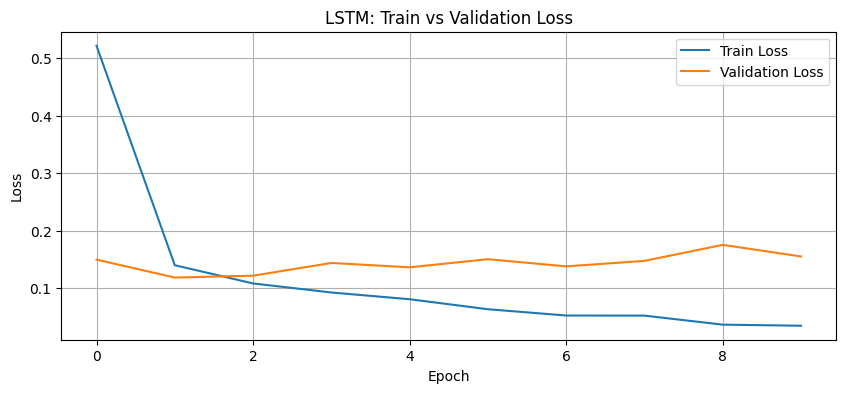

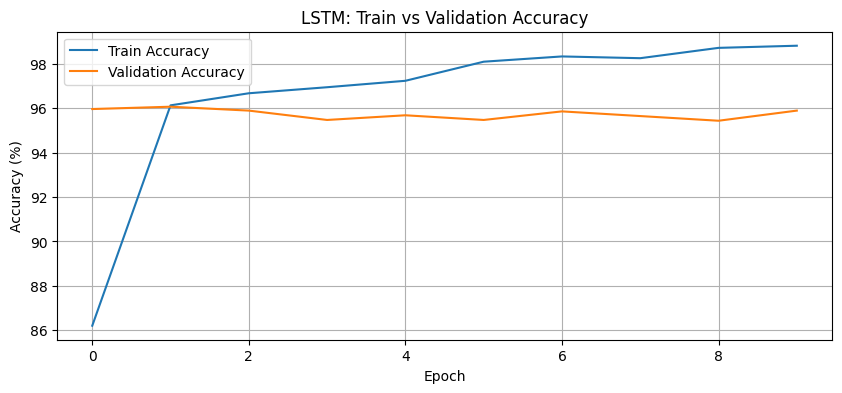

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM: Train vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('LSTM: Train vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#1d convolution neural network model
import torch.nn as nn
import torch.nn.functional as F

class CNNComplaintClassifier(nn.Module):
    def __init__(self, embedding_matrix, num_classes, pad_idx):
        super(CNNComplaintClassifier, self).__init__()
        vocab_size, emb_dim = embedding_matrix.shape
        self.embedding = nn.Embedding.from_pretrained(
            embedding_matrix,
            freeze=False,
            padding_idx=pad_idx
        )

        self.conv1 = nn.Conv1d(in_channels=emb_dim, out_channels=100, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(100, num_classes)

    def forward(self, x):
        emb = self.embedding(x)
        emb = emb.permute(0, 2, 1)
        conv_out = self.conv1(emb)
        activated = self.relu(conv_out)
        pooled = self.pool(activated).squeeze(-1)
        dropped = self.dropout(pooled)
        return self.fc(dropped)


In [ ]:
model_cnn = CNNComplaintClassifier(
    embedding_matrix=embedding_matrix,
    num_classes=num_classes,
    pad_idx=wordtoindex['<PAD>']
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cnn.parameters(), lr=0.001)

# Lists to store metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

EPOCHS = 2

for epoch in range(EPOCHS):
    # --- Training ---
    model_cnn.train()
    total_loss = correct = total = 0

    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model_cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    avg_train_loss = total_loss / len(train_dataloader)
    train_acc = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)


    model_cnn.eval()
    val_loss = correct = total = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = model_cnn(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()

    avg_val_loss = val_loss / len(val_dataloader)
    val_acc = 100 * correct / total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{EPOCHS}, "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
          f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%")


Epoch 1/2, Train Loss: 0.7283, Train Acc: 86.64%, Val Loss: 0.1514, Val Acc: 96.28%
Epoch 2/2, Train Loss: 0.1847, Train Acc: 95.30%, Val Loss: 0.1123, Val Acc: 96.59%


In [ ]:
#evaluating the cnn model
model_cnn.eval()
preds, actual = [], []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model_cnn(inputs)
        _, predicted = torch.max(outputs, 1)
        preds.extend(predicted.tolist())
        actual.extend(labels.tolist())

from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score,f1_score
print("precision",precision_score(actual,preds,average='weighted'))
print("recall",recall_score(actual,preds,average='weighted'))
print("f1 score",f1_score(actual,preds,average='weighted'))
print("\nClassification Report")
print(classification_report(actual, preds))
print("\nConfusion Matrix")
print(confusion_matrix(actual, preds))


precision 0.9620896271560304
recall 0.9611486486486487
f1 score 0.9613269036032005

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       187
           1       1.00      1.00      1.00       186
           2       0.99      0.97      0.98       187
           3       0.94      0.89      0.92       187
           4       1.00      1.00      1.00       187
           5       1.00      0.99      1.00       186
           6       0.98      0.97      0.98       188
           7       0.90      0.95      0.92       187
           8       0.95      0.90      0.92       187
           9       1.00      1.00      1.00       187
          10       0.90      0.89      0.90       188
          11       0.86      0.93      0.90       186
          12       0.99      0.95      0.97       187
          13       0.96      0.98      0.97       186
          14       1.00      0.97      0.99       188
          15       0.99      

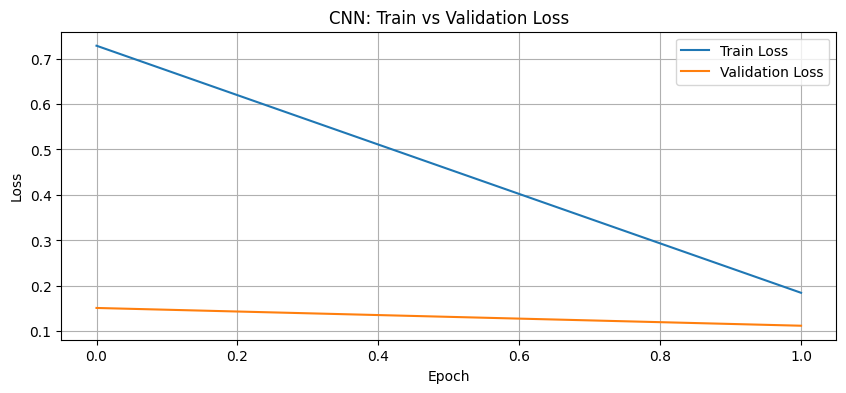

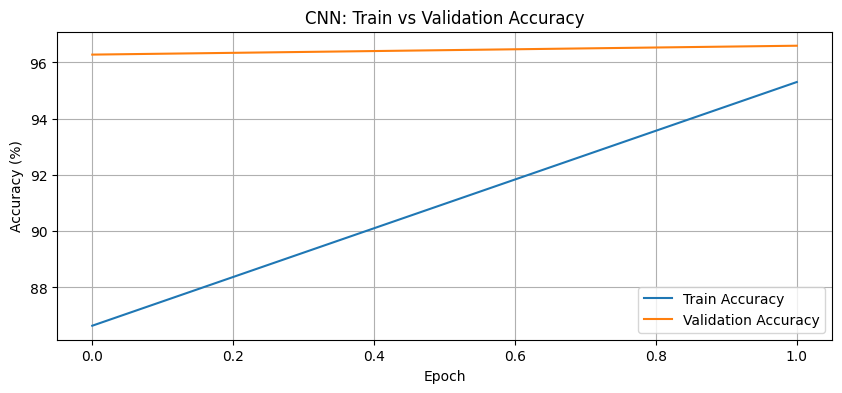

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN: Train vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('CNN: Train vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


The predicted category for the complaint 'Refund still not received 15 days after return pickup.' is: Return Pickup Delay


In [ ]:
import pickle

# Define the filename for the pickle file
filename = 'complaint_classifier.pkl'

# Save the objects to the pickle file
with open(filename, 'wb') as f:
    pickle.dump({
        'model_state_dict': model_cnn.state_dict(),
        'wordtoindex': wordtoindex,
        'label_encoder': label_encoder,
        'embedding_matrix': embedding_matrix,
        'pad_idx': wordtoindex['<PAD>'],
        'num_classes': num_classes,
        'embedding_dim': embedding_matrix.shape[1],
        'max_len': 50 # Assuming max_len is 50 as used in padding
    }, f)

print(f"Model and related objects saved to {filename}")

Model and related objects saved to complaint_classifier.pkl


In [ ]:
import pickle
import torch

# Define the filename for the pickle file
filename = 'complaint_classifier.pkl'

# Load the objects from the pickle file
with open(filename, 'rb') as f:
    loaded_objects = pickle.load(f)

# Extract the loaded objects
loaded_model_state_dict = loaded_objects['model_state_dict']
loaded_wordtoindex = loaded_objects['wordtoindex']
loaded_label_encoder = loaded_objects['label_encoder']
loaded_embedding_matrix = loaded_objects['embedding_matrix']
loaded_pad_idx = loaded_objects['pad_idx']
loaded_num_classes = loaded_objects['num_classes']
loaded_embedding_dim = loaded_objects['embedding_dim']
loaded_max_len = loaded_objects['max_len']

# Recreate the model architecture (assuming CNN was saved)
loaded_model = CNNComplaintClassifier(
    embedding_matrix=loaded_embedding_matrix,
    num_classes=loaded_num_classes,
    pad_idx=loaded_pad_idx
).to(device)

# Load the saved state dictionary into the model
loaded_model.load_state_dict(loaded_model_state_dict)

print("Model and related objects loaded successfully.")

Model and related objects loaded successfully.


In [ ]:
def predict_complaint_category(text, model, wordtoindex, label_encoder, max_len=50, pad_idx=0):
    # Preprocess the text
    processed_text = preprocess_text(text)

    # Tokenize and convert to indices
    tokens = processed_text.split()
    token_indices = tokentoindex(tokens, wordtoindex)

    # Pad the sequence
    padded_indices = pad_to_fixed_length(token_indices, max_len, pad_idx)

    # Convert to tensor and add batch dimension
    input_tensor = torch.tensor([padded_indices], dtype=torch.long).to(device)

    # Set model to evaluation mode
    model.eval()

    # Make prediction
    with torch.no_grad():
        outputs = model(input_tensor)
        _, predicted_index = torch.max(outputs, 1)

    # Convert predicted index back to category label
    predicted_category = label_encoder.inverse_transform(predicted_index.cpu().numpy())[0]

    return predicted_category

In [ ]:
# Example real-time input using loaded objects
complaint_text_loaded = "Refund still not received 15 days after return pickup."

# Predict the category using the loaded model and objects
predicted_category_loaded = predict_complaint_category(
    complaint_text_loaded,
    loaded_model,
    loaded_wordtoindex,
    loaded_label_encoder,
    max_len=loaded_max_len,
    pad_idx=loaded_pad_idx
)

print(f"The predicted category for the complaint '{complaint_text_loaded}' using loaded objects is: {predicted_category_loaded}")

The predicted category for the complaint 'Refund still not received 15 days after return pickup.' using loaded objects is: Return Pickup Delay


In [ ]:
import random

# Select a random row from the data DataFrame
random_index = random.randint(0, len(data) - 1)
sample_complaint = data.iloc[random_index]['Complaint']
actual_category = label_encoder.inverse_transform([data.iloc[random_index]['Predicted_category']])[0]

# Predict the category using the loaded model and objects
predicted_category_sample = predict_complaint_category(
    sample_complaint,
    loaded_model,
    loaded_wordtoindex,
    loaded_label_encoder,
    max_len=loaded_max_len,
    pad_idx=loaded_pad_idx
)

print(f"Sample Complaint: '{sample_complaint}'")
print(f"Actual Category: {actual_category}")
print(f"Predicted Category: {predicted_category_sample}")

Sample Complaint: 'Cashback promised during payment not received.'
Actual Category: Order Not Delivered
Predicted Category: Payment Issue


In [4]:
!pip install nbstripout



In [7]:
!nbstripout FlipcartComplaintClassification.ipynb

Could not strip 'FlipcartComplaintClassification.ipynb': file not found
